In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi

from MCForecastTools import MCSimulation

%matplotlib inline


Bad key savefig.frameon in file /Users/matthouk/anaconda3/envs/projectenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/matthouk/anaconda3/envs/projectenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/matthouk/anaconda3/envs/projectenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename

In [2]:
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [3]:
tickersp = ['SPY']

tickersfin = ['ESGD','EFAX','SPYX', 'CRBN', 'ETHO', 'FAN']

timeframe = "1D"

# Pulling just a year for now to ensure they have usable data: 
start_date = pd.Timestamp("2020-01-14", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-14", tz="America/New_York").isoformat()

# pulling 3 years to January 19, 2021
# start_date = pd.Timestamp("2017-05-04", tz="America/New_York").isoformat()
# end_date = pd.Timestamp("2021-01-14", tz="America/New_York").isoformat()

# Here is the API call for the working tickers: 
esg_datafin = api.get_barset(
    tickersfin,
    timeframe,
    start=start_date,
    end=end_date
).df

# API call for SP500
sp500_data = api.get_barset(
    tickersp,
    timeframe,
    start=start_date,
    end=end_date
).df 

esg_datafin.tail(10)


CRBN                                       \
                             open      high       low     close volume   
time                                                                     
2020-12-31 00:00:00-05:00  148.79  149.1200  148.4344  148.8900  11051   
2021-01-04 00:00:00-05:00  150.57  150.5700  147.3300  148.2600  22735   
2021-01-05 00:00:00-05:00  148.31  149.9300  148.3100  149.7400  18455   
2021-01-06 00:00:00-05:00  149.04  151.6100  148.9950  150.3299   8590   
2021-01-07 00:00:00-05:00  151.03  152.2400  151.0300  152.2400  10608   
2021-01-08 00:00:00-05:00  153.04  153.3450  152.2700  153.3400  14588   
2021-01-11 00:00:00-05:00  151.57  152.7000  151.5700  152.2499  34040   
2021-01-12 00:00:00-05:00  152.06  152.4900  151.5377  152.4160  11716   
2021-01-13 00:00:00-05:00  152.31  153.0900  152.3100  152.6800  10339   
2021-01-14 00:00:00-05:00  153.09  153.4784  152.5200  152.5200  15376   

                             EFAX                                     ...  \
                             open    high      low    close   volume  ...   
time                                                                  ...   
2020-12-31 00:00:00-05:00  78.250  78.250  77.8541  77.9700   2813.0  ...   
2021-01-04 00:00:00-05:00  79.320  79.320  77.9600  78.3900  14051.0  ...   
2021-01-05 00:00:00-05:00  78.660  79.108  78.4300  79.0800  10190.0  ...   
2021-01-06 00:00:00-05:00  79.320  79.790  79.3200  79.7000   6864.0  ...   
2021-01-07 00:00:00-05:00  79.230  79.780  79.2300  79.7800   5894.0  ...   
2021-01-08 00:00:00-05:00  80.225  80.380  79.8800  80.3000   5610.0  ...   
2021-01-11 00:00:00-05:00  78.900  79.510  78.9000  79.4169   8060.0  ...   
2021-01-12 00:00:00-05:00  79.165  79.540  79.0300  79.5400   4674.0  ...   
2021-01-13 00:00:00-05:00  79.660  79.740  79.3000  79.4841   2435.0  ...   
2021-01-14 00:00:00-05:00  79.540  80.268  79.5400  80.2680  11677.0  ...   

                             FAN                                     SPYX  \
                            open     high      low   close  volume   open   
time                                                                        
2020-12-31 00:00:00-05:00  23.38  23.3900  23.2200  23.300  133095  92.44   
2021-01-04 00:00:00-05:00  24.10  24.1700  23.8104  23.920  640086  93.28   
2021-01-05 00:00:00-05:00  24.01  24.1900  23.9501  24.165  443523  91.36   
2021-01-06 00:00:00-05:00  24.83  25.3700  24.6500  25.080  716286  91.36   
2021-01-07 00:00:00-05:00  25.80  26.0350  25.6845  26.015  676909  93.49   
2021-01-08 00:00:00-05:00  26.00  26.1400  25.7300  25.970  590216  94.25   
2021-01-11 00:00:00-05:00  25.31  25.5100  25.1500  25.470  481884  94.00   
2021-01-12 00:00:00-05:00  25.21  25.2156  24.9100  25.030  539505  93.93   
2021-01-13 00:00:00-05:00  25.21  25.2400  25.1000  25.100  373769  93.50   
2021-01-14 00:00:00-05:00  25.11  25.1100  24.8000  24.850  585176  94.17   

                                                         
                            high      low  close volume  
time                                                     
2020-12-31 00:00:00-05:00  93.03  92.2200  93.02  14577  
2021-01-04 00:00:00-05:00  93.28  90.6400  91.51  40657  
2021-01-05 00:00:00-05:00  92.21  91.3600  92.05  21952  
2021-01-06 00:00:00-05:00  93.29  91.3600  92.52  32379  
2021-01-07 00:00:00-05:00  93.99  93.2500  93.84  37666  
2021-01-08 00:00:00-05:00  94.25  93.3133  94.20  28302  
2021-01-11 00:00:00-05:00  94.07  93.3925  93.73  38854  
2021-01-12 00:00:00-05:00  93.93  93.0600  93.65  15194  
2021-01-13 00:00:00-05:00  94.06  93.4100  93.83  17488  
2021-01-14 00:00:00-05:00  94.17  93.3696  93.44  20680  

[10 rows x 30 columns]

In [4]:
# Basic data 
esg_datafin.describe()

CRBN                                                    \
             open        high         low       close        volume   
count  254.000000  254.000000  254.000000  254.000000  2.540000e+02   
mean   127.217250  127.916623  126.494517  127.202382  2.480299e+04   
std     13.699869   13.476167   13.998184   13.743453  1.088300e+05   
min     90.880000   91.000000   87.450000   89.440000  9.620000e+02   
25%    119.027500  120.153875  118.476150  119.470350  5.883000e+03   
50%    129.585000  130.093600  129.180000  129.740000  1.009900e+04   
75%    134.307500  135.226250  133.672500  134.443500  2.310025e+04   
max    153.090000  153.478400  152.520000  153.340000  1.720440e+06   

             EFAX                                                     ...  \
             open        high         low       close         volume  ...   
count  247.000000  247.000000  247.000000  247.000000     247.000000  ...   
mean    67.584000   67.844269   67.370002   67.620818    6750.712551  ...   
std      6.803094    6.702849    6.865797    6.814774   12564.175031  ...   
min     49.690000   49.970000   49.200000   49.250000     100.000000  ...   
25%     64.235050   64.779950   64.120000   64.519500    1530.000000  ...   
50%     68.310000   68.441000   68.180000   68.360000    3110.000000  ...   
75%     72.310000   72.490000   72.225250   72.425000    6552.500000  ...   
max     80.225000   80.380000   79.880000   80.300000  134347.000000  ...   

              FAN                                                    \
             open        high         low       close        volume   
count  254.000000  254.000000  254.000000  254.000000  2.540000e+02   
mean    16.407354   16.505635   16.289602   16.403234  1.571514e+05   
std      3.368629    3.364416    3.376998    3.375406  2.107817e+05   
min     10.580000   10.590000   10.170000   10.230000  6.286000e+03   
25%     14.145000   14.235000   13.985000   14.152500  3.531350e+04   
50%     15.700000   15.840000   15.680000   15.762500  1.042055e+05   
75%     18.452500   18.487575   18.250000   18.335000  1.958420e+05   
max     26.000000   26.140000   25.730000   26.015000  2.241606e+06   

             SPYX                                                     
             open        high         low       close         volume  
count  254.000000  254.000000  254.000000  254.000000     254.000000  
mean    80.131097   80.601872   79.408883   80.005972   49066.114173  
std      8.411602    8.139790    8.597520    8.362036   46345.971157  
min     57.130000   57.130000   54.300000   55.585000    5842.000000  
25%     75.015000   75.867500   74.067500   75.008750   22352.500000  
50%     81.320000   81.580000   80.801050   81.260000   32896.500000  
75%     85.657500   86.257500   85.180000   85.569525   54790.000000  
max     94.250000   94.250000   93.410000   94.200000  248066.000000  

[8 rows x 30 columns]

In [5]:
closingprice = pd.DataFrame()

closingprice['SPYX'] = esg_datafin['SPYX']['close']
closingprice['ESGD'] = esg_datafin['ESGD']['close']
closingprice['CRBN'] = esg_datafin['CRBN']['close']
closingprice['EFAX'] = esg_datafin['EFAX']['close']
closingprice['ETHO'] = esg_datafin['ETHO']['close']
closingprice['FAN'] = esg_datafin['FAN']['close']

closingprice.index = closingprice.index.date 

dailyreturns = closingprice.pct_change().dropna()

dailyreturns.head()



,SPYX,ESGD,CRBN,EFAX,ETHO,FAN
2020-01-15,0.002492,0.000290,0.000304,-0.001368,0.001778,0.008237
2020-01-16,0.008380,0.004342,0.004179,0.002328,0.009831,0.010272
2020-01-17,0.003030,0.003026,0.005448,0.002187,0.000783,0.003299
2020-01-21,-0.001106,-0.006752,-0.004214,-0.007909,0.001156,0.000000
2020-01-22,0.002092,0.000868,0.001360,0.004947,0.002134,0.004027


In [6]:
# Configuring the sim
MC_oneyear = MCSimulation(
    portfolio_data = esg_datafin,
    weights = [.166,.166,.166,.166,.166,.166],
    num_simulation = 500,
    num_trading_days =252)

In [7]:
#Sim input data
MC_oneyear.portfolio_data.tail()

CRBN                                       \
                             open      high       low     close volume   
time                                                                     
2021-01-08 00:00:00-05:00  153.04  153.3450  152.2700  153.3400  14588   
2021-01-11 00:00:00-05:00  151.57  152.7000  151.5700  152.2499  34040   
2021-01-12 00:00:00-05:00  152.06  152.4900  151.5377  152.4160  11716   
2021-01-13 00:00:00-05:00  152.31  153.0900  152.3100  152.6800  10339   
2021-01-14 00:00:00-05:00  153.09  153.4784  152.5200  152.5200  15376   

                                          EFAX                          ...  \
                          daily_return    open    high    low    close  ...   
time                                                                    ...   
2021-01-08 00:00:00-05:00     0.007225  80.225  80.380  79.88  80.3000  ...   
2021-01-11 00:00:00-05:00    -0.007109  78.900  79.510  78.90  79.4169  ...   
2021-01-12 00:00:00-05:00     0.001091  79.165  79.540  79.03  79.5400  ...   
2021-01-13 00:00:00-05:00     0.001732  79.660  79.740  79.30  79.4841  ...   
2021-01-14 00:00:00-05:00    -0.001048  79.540  80.268  79.54  80.2680  ...   

                             FAN                               SPYX         \
                             low  close  volume daily_return   open   high   
time                                                                         
2021-01-08 00:00:00-05:00  25.73  25.97  590216    -0.001730  94.25  94.25   
2021-01-11 00:00:00-05:00  25.15  25.47  481884    -0.019253  94.00  94.07   
2021-01-12 00:00:00-05:00  24.91  25.03  539505    -0.017275  93.93  93.93   
2021-01-13 00:00:00-05:00  25.10  25.10  373769     0.002797  93.50  94.06   
2021-01-14 00:00:00-05:00  24.80  24.85  585176    -0.009960  94.17  94.17   

                                                               
                               low  close volume daily_return  
time                                                           
2021-01-08 00:00:00-05:00  93.3133  94.20  28302     0.003836  
2021-01-11 00:00:00-05:00  93.3925  93.73  38854    -0.004989  
2021-01-12 00:00:00-05:00  93.0600  93.65  15194    -0.000854  
2021-01-13 00:00:00-05:00  93.4100  93.83  17488     0.001922  
2021-01-14 00:00:00-05:00  93.3696  93.44  20680    -0.004156  

[5 rows x 36 columns]

In [8]:
MC_oneyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 400.


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.019129,1.005481,0.995654,0.991183,0.987584,0.994598,1.000679,1.009222,0.992090,1.019263,...,1.000009,1.007820,0.999478,1.004826,1.006980,0.998615,1.009603,0.988357,1.001101,0.996484
2,1.007404,1.018538,0.975737,0.993788,0.978186,0.996486,1.014764,1.012980,0.977456,1.020470,...,0.995034,1.013384,0.986476,1.001719,1.001531,0.999955,1.035357,0.989105,1.010494,0.985331
3,1.007228,1.009972,0.972093,0.994823,0.970783,0.997005,1.013987,1.032147,0.982601,1.023503,...,1.001003,1.014111,1.001027,0.991791,0.988349,1.001320,1.035326,0.988030,1.020734,0.986257
4,1.000595,0.998355,0.988689,1.007865,0.962871,0.992669,1.020884,1.045438,0.970507,1.023002,...,0.990012,1.009999,1.010473,1.011592,1.003372,0.993678,1.039181,0.974447,1.032206,0.985432
5,0.999716,1.010173,0.990181,1.022004,0.961690,0.999211,1.021424,1.056539,0.961926,1.042465,...,0.991360,1.010235,1.015628,1.004714,1.015884,0.991446,1.038065,0.972583,1.047814,0.985658
6,0.989732,1.006795,0.998758,1.022057,0.959393,0.970384,1.017228,1.081700,0.954199,1.052621,...,0.991459,1.012875,1.020673,0.992719,1.012807,0.997219,1.043305,0.968304,1.035948,0.978884
7,0.987959,1.005614,1.003844,1.029732,0.957400,0.964925,1.025514,1.083663,0.946024,1.061144,...,0.989059,1.004658,1.023147,0.989927,1.013690,0.996272,1.048215,0.967035,1.028849,0.987421
8,0.984684,0.999028,1.006321,1.038331,0.974253,0.967769,1.019605,1.087077,0.940717,1.056937,...,0.973524,0.994543,1.023218,0.991329,1.018507,0.993502,1.032767,0.953181,1.021409,0.990476
9,0.993623,0.985614,1.001341,1.041169,0.983646,0.963061,1.021689,1.084901,0.954260,1.045107,...,0.975820,1.004443,1.024441,0.980333,1.040981,0.982321,1.028459,0.960948,1.012404,1.007458


In [23]:
line_plot_one_year = MC_oneyear.plot_simulation()

# stole this from desta 
# line_plot_one_year.grid()

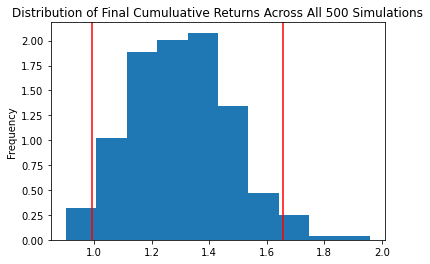

In [24]:
# Plot the one year sim
dist_plot_one_year = MC_oneyear.plot_distribution()



In [11]:
stat_data_one_year = MC_oneyear.summarize_cumulative_return()
print(stat_data_one_year)

count           500.000000
mean              1.302484
std               0.173401
min               0.901279
25%               1.180347
50%               1.289958
75%               1.416376
max               1.959330
95% CI Lower      0.992000
95% CI Upper      1.654772
Name: 252, dtype: float64


In [12]:
#Range of possible outcomes based on the confidence interval
ci_lower = round(stat_data_one_year[8]*10000,2)
ci_upper = round(stat_data_one_year[9]*10000,2)

print(f'There is a 95% chance that an initial investment of $10000 in the portfolio '
      f'over the next five years will end within the range of'
      f'${ci_lower}and ${ci_upper}')

There is a 95% chance that an initial investment of $10000 in the portfolio over the next five years will end within the range of$9920.0and $16547.72


In [13]:
sp500_data.describe()

SPY                                                  
             open        high         low       close        volume
count  254.000000  254.000000  254.000000  254.000000  2.540000e+02
mean   323.058934  325.801256  320.244730  323.081126  9.305979e+07
std     33.608245   32.322757   34.495655   33.428856  6.188764e+07
min    228.190000  229.683300  218.260000  222.510000  2.104794e+07
25%    303.712500  307.762500  299.052500  303.640000  5.270722e+07
50%    328.350000  330.905000  327.042000  328.755000  7.263635e+07
75%    343.665000  347.232500  342.367500  344.007425  1.074804e+08
max    380.590000  381.490000  378.100000  381.240000  3.466706e+08

In [14]:
closingprice_spy = sp500_data['SPY']['close']

closingprice_spy = pd.DataFrame(closingprice_spy)

closingprice_spy.index = closingprice_spy.index.date 

dailyreturns_spy = closingprice_spy.pct_change().dropna()

dailyreturns_spy.head()

,close
2020-01-15,0.002260
2020-01-16,0.008319
2020-01-17,0.003354
2020-01-21,-0.002108
2020-01-22,0.000241


In [15]:
# dailyreturns_spy.head()
dailyreturns_spy = dailyreturns_spy.rename(columns={"close":"S&P 500"})

all_ports = pd.concat([dailyreturns, dailyreturns_spy], axis="columns", join="inner")
all_ports.head()

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN,S&P 500
2020-01-15,0.002492,0.000290,0.000304,-0.001368,0.001778,0.008237,0.002260
2020-01-16,0.008380,0.004342,0.004179,0.002328,0.009831,0.010272,0.008319
2020-01-17,0.003030,0.003026,0.005448,0.002187,0.000783,0.003299,0.003354
2020-01-21,-0.001106,-0.006752,-0.004214,-0.007909,0.001156,0.000000,-0.002108
2020-01-22,0.002092,0.000868,0.001360,0.004947,0.002134,0.004027,0.000241


<AxesSubplot:title={'center':'Daily Returns'}>

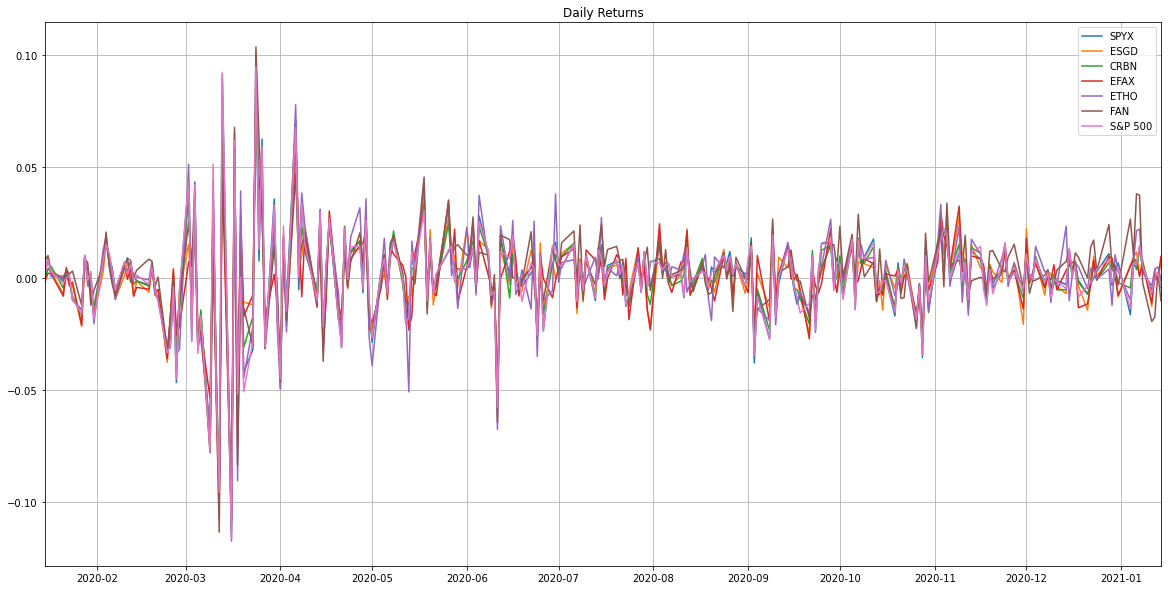

In [16]:
all_ports.plot(figsize=(20, 10), title="Daily Returns",grid=True)

<AxesSubplot:title={'center':'Cumulative Returns'}>

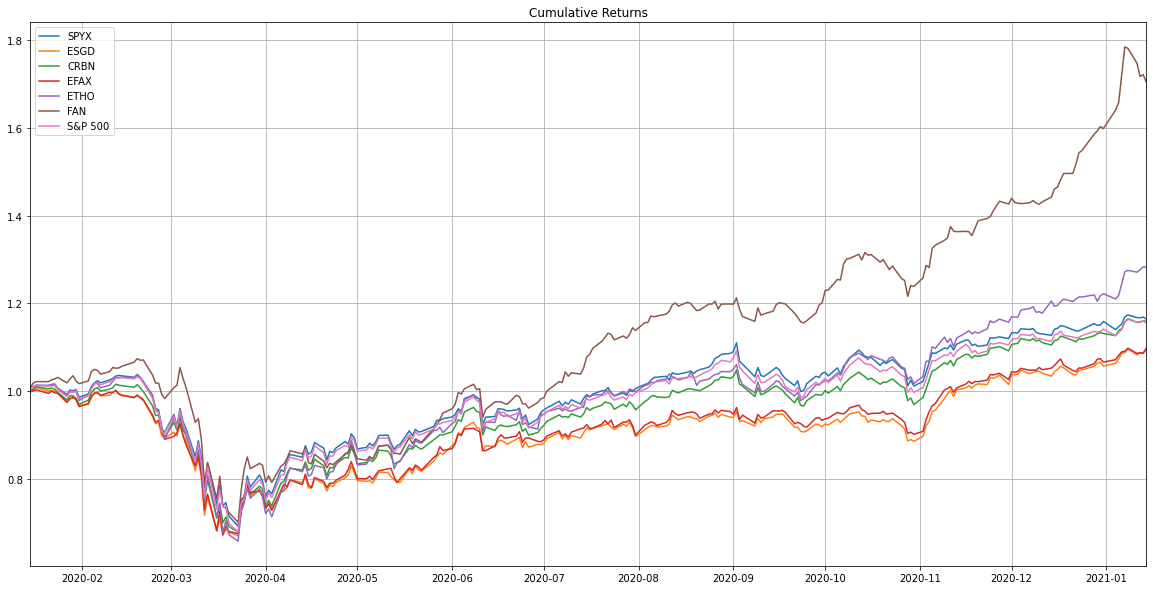

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_ports).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns",grid=True)

In [18]:
# Calculate the daily standard deviations of all portfolios
all_ports.std()

SPYX       0.021364
ESGD       0.019349
CRBN       0.019555
EFAX       0.019262
ETHO       0.022894
FAN        0.021315
S&P 500    0.021589
dtype: float64

In [19]:
# Checking for riskier portfolio
sp500_risk = all_ports['S&P 500'].std()
all_ports.std() > sp500_risk

SPYX       False
ESGD       False
CRBN       False
EFAX       False
ETHO        True
FAN        False
S&P 500    False
dtype: bool

<AxesSubplot:title={'center':'30 Day Rolling Standard Deviation'}>

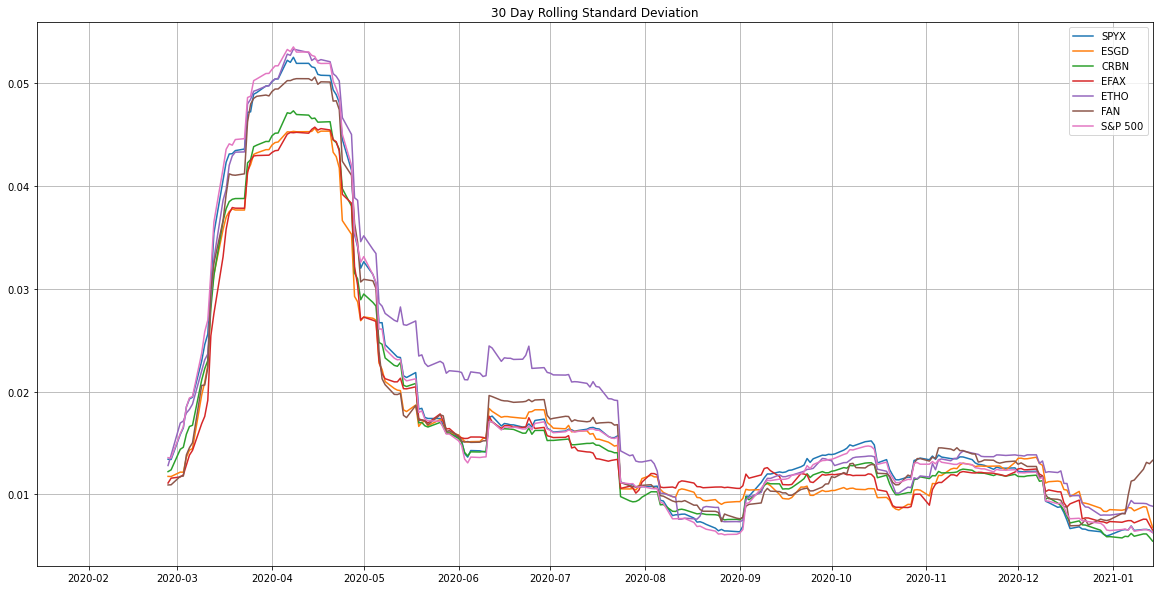

In [20]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_standard = all_ports.rolling(window=30).std()

# Plot the rolling standard deviation
rolling_standard.plot(figsize=(20, 10), title="30 Day Rolling Standard Deviation",grid=True)

In [21]:
# Calculate the correlation
corr_df = all_ports.corr()

# Display de correlation matrix
corr_df.style.background_gradient(cmap="inferno")

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN,S&P 500
SPYX,1,0.91341,0.971006,0.84987,0.919564,0.859487,0.993713
ESGD,0.91341,1,0.955421,0.94198,0.89136,0.904004,0.915218
CRBN,0.971006,0.955421,1,0.912363,0.939864,0.888175,0.968923
EFAX,0.84987,0.94198,0.912363,1,0.875163,0.869169,0.851159
ETHO,0.919564,0.89136,0.939864,0.875163,1,0.860224,0.912381
FAN,0.859487,0.904004,0.888175,0.869169,0.860224,1,0.861699
S&P 500,0.993713,0.915218,0.968923,0.851159,0.912381,0.861699,1


In [22]:
# Calculate covariance of a single portfolio
covariance = all_portfolios['FAN'].rolling(window=60).cov(all_portfolios["S&P 500"])

# Calculate variance of S&P TSX
variance = all_portfolios["S&P 500"].rolling(60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize=(20, 10), title="FAN. Beta", grid=True) 

NameError: name 'all_portfolios' is not defined

In [ ]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_ports.mean() * 252) / (all_ports.std() * np.sqrt(252))
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios",grid=True)

When comparing the ESG asset being evaluated versus the bench mark portfolio (S&P500), three of the ESG funds show a higher sharp ratio. Hence these assets provide better return, given the same risk (or the same return for a lower risk) 